## Objetivo
Aprender las diferentes formas de recorrer un grafo y construir los algoritmos correspondientes.

## Preguntas básicas
1.	¿En qué consiste el recorrido DFS sobre un grafo?
3.	¿En qué consiste el recorrido BFS sobre un grafo?

## Introducción
Al igual que en los árboles, los grafos son estructuras en las cuales una de las principales operaciones es el recorrido sobre ellas. Trataremos en este módulo las diferentes formas en que se recorren los árboles.

**Recorrido DFS**. Recibe este nombre porque son las iniciales de las palabras en inglés **Depth First Search**:  búsqueda primero en profundidad. El recorrido DFS consiste en: estando ubicados en un vértice i cualquiera, determinar los vértices adyacentes, de esos vértices adyacentes elegir uno que no haya sido visitado y a partir de ahí iniciar nuevamente recorrido DFS. Observe que estamos planteando una definición recursiva para el recorrido.

**Recorrido BFS**. Recibe este nombre porque son las iniciales de las palabras en inglés **Breadth First Search**: búsqueda primero a lo ancho. Hay una diferencia sustancial entre este recorrido y el DFS: mientras que en el recorrido DFS no se visitan de una vez todos los adyacentes a un vértice dado, aquí hay que visitar primero todos los vértices adyacentes a un vértice dado antes de continuar el recorrido

## Ejemplo de uso e implementación

usaremos **colas** para controlar y determinar un recorrido BFS o BFS. Observa el uso de [`deque`](https://docs.python.org/2/library/collections.html) en Python


In [1]:
from collections import deque
import numpy as np
x = np.random.randint(100, size=10)
print("int list  ", x)
queue = deque()
for i in x:
    queue.append(i)
print("pop       ", end=' ')
while len(queue)>0:
    print(queue.pop(), end=' ')

    
queue = deque()
for i in x:
    queue.append(i)
print("\npop left  ", end=' ')
while len(queue)>0:
    print(queue.popleft(), end=' ')

int list   [52 26 29 22 12 96 45 86 70 34]
pop        34 70 86 45 96 12 22 29 26 52 
pop left   52 26 29 22 12 96 45 86 70 34 

### Recorridos sobre un laberinto
Observa cómo implemnetamos un recorrido con obstáculos:

- cómo **describrimos** el laberinto
- cómo el laberinto es equivalente a un grafo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
EMPTY, WALL, TARGET, USED = ".","X","T","o"
c  = pd.Series({"EMPTY": ".", "WALL":"X", "TARGET":"T", "USED":"o"})
ci = pd.Series({".": 0, "X": 255, "T":100, "o":200})

def plot_map(grid,p=[]):
    img = np.r_[[[ci[i] for i in j] for j in grid]]
    plt.imshow(img, alpha=.5)
    if(len(p)>0):
        for i in range(len(p)-1):
            plt.plot([p[i][1],p[i+1][1]],[p[i][0],p[i+1][0]], color="black", lw=4)    
        plt.title("path length = %d"%len(p))
        
    plt.xticks(list(range(img.shape[1])), list(range(img.shape[1])))
    plt.yticks(list(range(img.shape[0])), list(range(img.shape[0])))
    
def possible_moves(grid, y,x):
    moves = [ [y,x+1], [y-1,x], [y,x-1], [y+1,x]]
    
    moves = [(my,mx) for my,mx in moves if mx>=0 and mx<len(grid[0]) and \
                                           my>=0 and my<len(grid) and grid[my][mx]!=c.WALL]    
    return moves

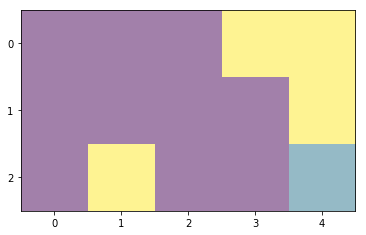

In [4]:
grid = ["...XX",
        "....X",
        ".X..T"]

plot_map(grid)

este laberinto  es equivalente al siguiente grafo.

In [5]:
import networkx as nx
import itertools
def draw_graph(grid, path=None, node_size=900, font_color="white"):
    g = nx.Graph()
    g.add_nodes_from([(i,j) for i,j in itertools.product(list(range(len(grid))), list(range(len(grid[0])))) if grid[i][j]!="X"])
    for i,j in g.nodes:
        for ni,nj in possible_moves(grid, i,j):
            g.add_edge((i,j), (ni,nj))
            
    if path is None:
        c = "blue"
    else:
        c = [1 if i in p else 0 for i in g.nodes.keys()]
    nx.drawing.draw(g, with_labels=True, 
                    node_alpha=.2, node_color=c, 
                    node_size=node_size, font_color=font_color)

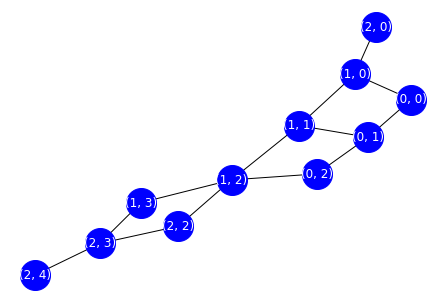

In [6]:
draw_graph(grid)

preuba con distintos laberintos para construir tu intuición del grafo asociado

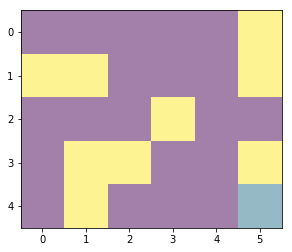

In [7]:
grid = [".....X",
        "XX...X",
        "...X..",
        ".XX..X",
        ".X...T"]

plot_map(grid)

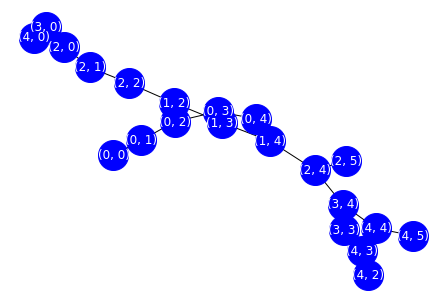

In [8]:
draw_graph(grid)

# Breath First Search

This is **breadth first**. We put the initial node into the queue. Then repeat this procedure until visit the goal node or visit all available nodes: take the first from the queue, check if it was visited or not, check if it's the goal, put all neighbours in the end of the queue, repeat. For each step we track not only the nodes, but directions and the path for the current node too.

- does it give the best answer?


See [here](http://bryukh.com/labyrinth-algorithms/).

In [9]:
from collections import deque

def bfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.popleft()
        if grid[y][x] == c.TARGET:
            if verbose:
                print("n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len))
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        for move in possible_moves(grid,y,x):
            queue.append((path + [(y,x)], move))

    return []

n_iterations 39, max_queue_len 8
success True


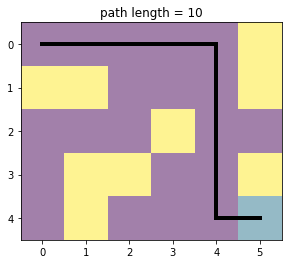

In [10]:
p=bfs_search(grid)
print("success", len(p)>0)
plot_map(grid, p)

In [11]:
print(p)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5)]


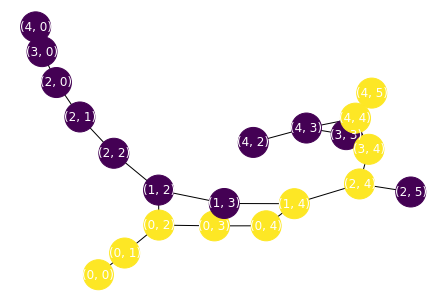

In [12]:
draw_graph(grid, path=p)

# Depth First Search

This is **depth first**. We simply use the other way around.

- Does it give the best answer?
- How is its computational complexity as compared with  BFS?

In [13]:
from collections import deque

def dfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.pop()
        if grid[y][x] == c.TARGET:
            if verbose:
                print("n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len))
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        for move in possible_moves(grid,y,x):
            queue.append((path + [(y,x)], move))
    return []

[(1, 2), (1, 0), (2, 1)]


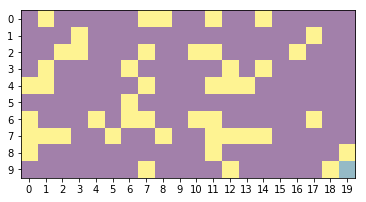

In [33]:
def generate_maze(size, prob=.7):
    grid = (np.random.random(size=size)>prob)*1
    grid = [[c.WALL if grid[x,y] else c.EMPTY for y in range(grid.shape[1])] for x in range(grid.shape[0])]
    grid[-1][-1]=c.TARGET
    return grid

grid = generate_maze(size=(10,20))
plot_map(grid)
print(possible_moves(grid, 1,1))

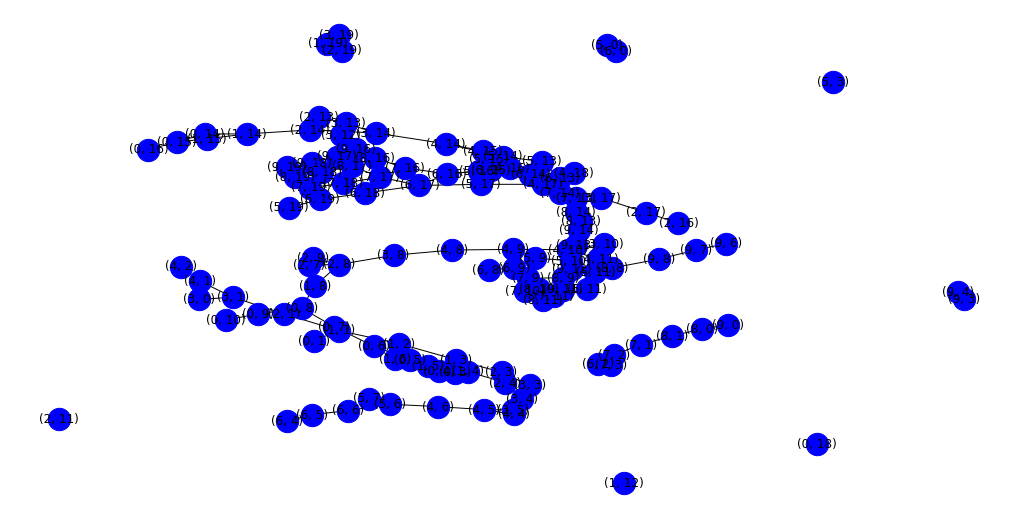

In [15]:
plt.figure(figsize=(14,7))
draw_graph(grid, node_size=500, font_color="black")

n_iterations 190, max_queue_len 64
success True


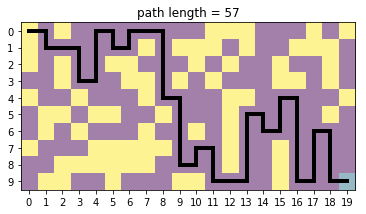

In [16]:
p=dfs_search(grid)
print("success", len(p)>0)
plot_map(grid, p)

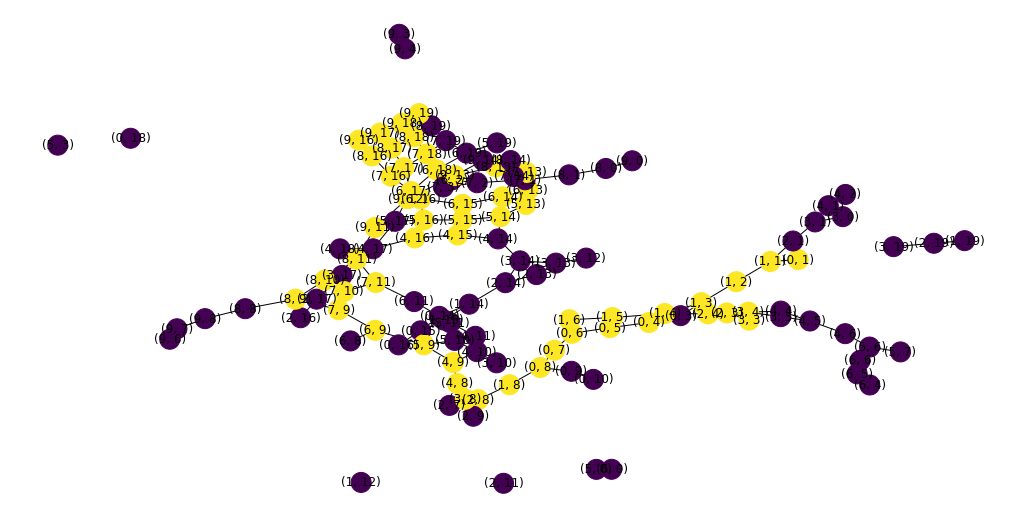

In [17]:
plt.figure(figsize=(14,7))
draw_graph(grid, node_size=400, font_color="black", path=p)

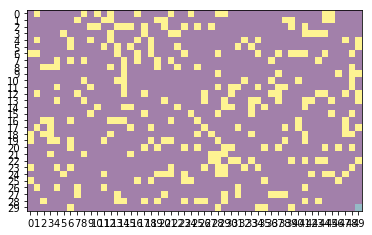

In [47]:
grid = generate_maze(size=(30,50), prob=.8)
plot_map(grid)

n_iterations 3829, max_queue_len 97
success True
209 ms ± 8.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


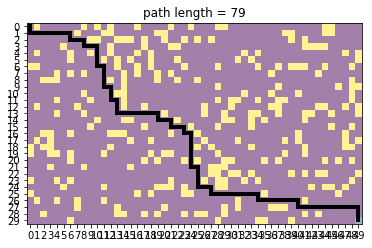

In [50]:
p_bfs = bfs_search(grid)
print ("success", len(p_bfs)>0)
%timeit bfs_search(grid, verbose=False)
plot_map(grid, p_bfs)

n_iterations 2470, max_queue_len 1080
success True
180 ms ± 4.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


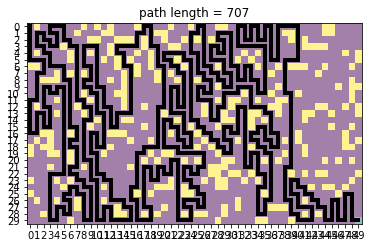

In [51]:
p_dfs = dfs_search(grid)
print ("success", len(p_dfs)>0)
%timeit dfs_search(grid, verbose=False)
plot_map(grid, p_dfs)

### let's shorten the answer of DFS

- is it now the best answer?

In [52]:
pp = np.r_[p_dfs]
i=0
while i<len(pp):
    for k in range(i+2, len(pp)):
        if np.sum(np.abs(pp[i]-pp[k]))==1:
            pp = np.concatenate((pp[:i+1], list(pp[k:])))
            break
    i+=1

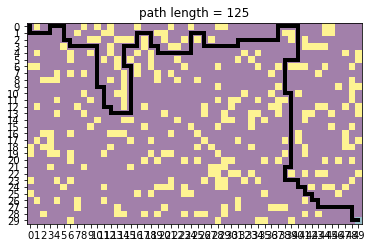

In [53]:
plot_map(grid, pp)

observe computing times. larger mazes makes DFS more iterations (but slower due to data structures which should be improved)

In [55]:
grid = generate_maze(size=(10,20), prob=.8)
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print ("bfs solution len", len(bfs_search(grid)))
print ("dfs solution len", len(dfs_search(grid)))

22.2 ms ± 405 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.5 ms ± 445 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_iterations 426, max_queue_len 33
bfs solution len 31
n_iterations 268, max_queue_len 116
dfs solution len 83


In [56]:
grid = generate_maze(size=(20,30))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print ("bfs solution len", len(bfs_search(grid)))
print ("dfs solution len", len(dfs_search(grid)))

63.9 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
46.9 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_iterations 1134, max_queue_len 73
bfs solution len 49
n_iterations 698, max_queue_len 241
dfs solution len 197


In [57]:
grid = generate_maze(size=(50,50))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print ("bfs solution len", len(bfs_search(grid)))
print ("dfs solution len", len(dfs_search(grid)))

73.4 µs ± 870 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
74.4 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
bfs solution len 0
dfs solution len 0
